In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()
#iron
ironAbundances=dataframe['Iron'].to_numpy()
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()

In [7]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()
thoriumAbundances=dataframe['Thorium'].to_numpy()
uraniumAbundances=dataframe['Uranium'].to_numpy()

In [8]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Log Normalized Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)

In [9]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [10]:
#set the upper and lower bounds for the relavent energies
lowerEnergyBound=500
upperEnergyBound=8000

In [11]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-upperEnergyBound))
#compute the index of the first relavent band
firstRelaventBandIndex=np.argmin(np.abs(energyBands-lowerEnergyBound))
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex+1:finalRelaventBandIndex+1]

In [12]:
#get the spectra in just the relavent bands
preprocessedSpectra=preprocessedSpectra[:,firstRelaventBandIndex+1:finalRelaventBandIndex+1]

In [13]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [14]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

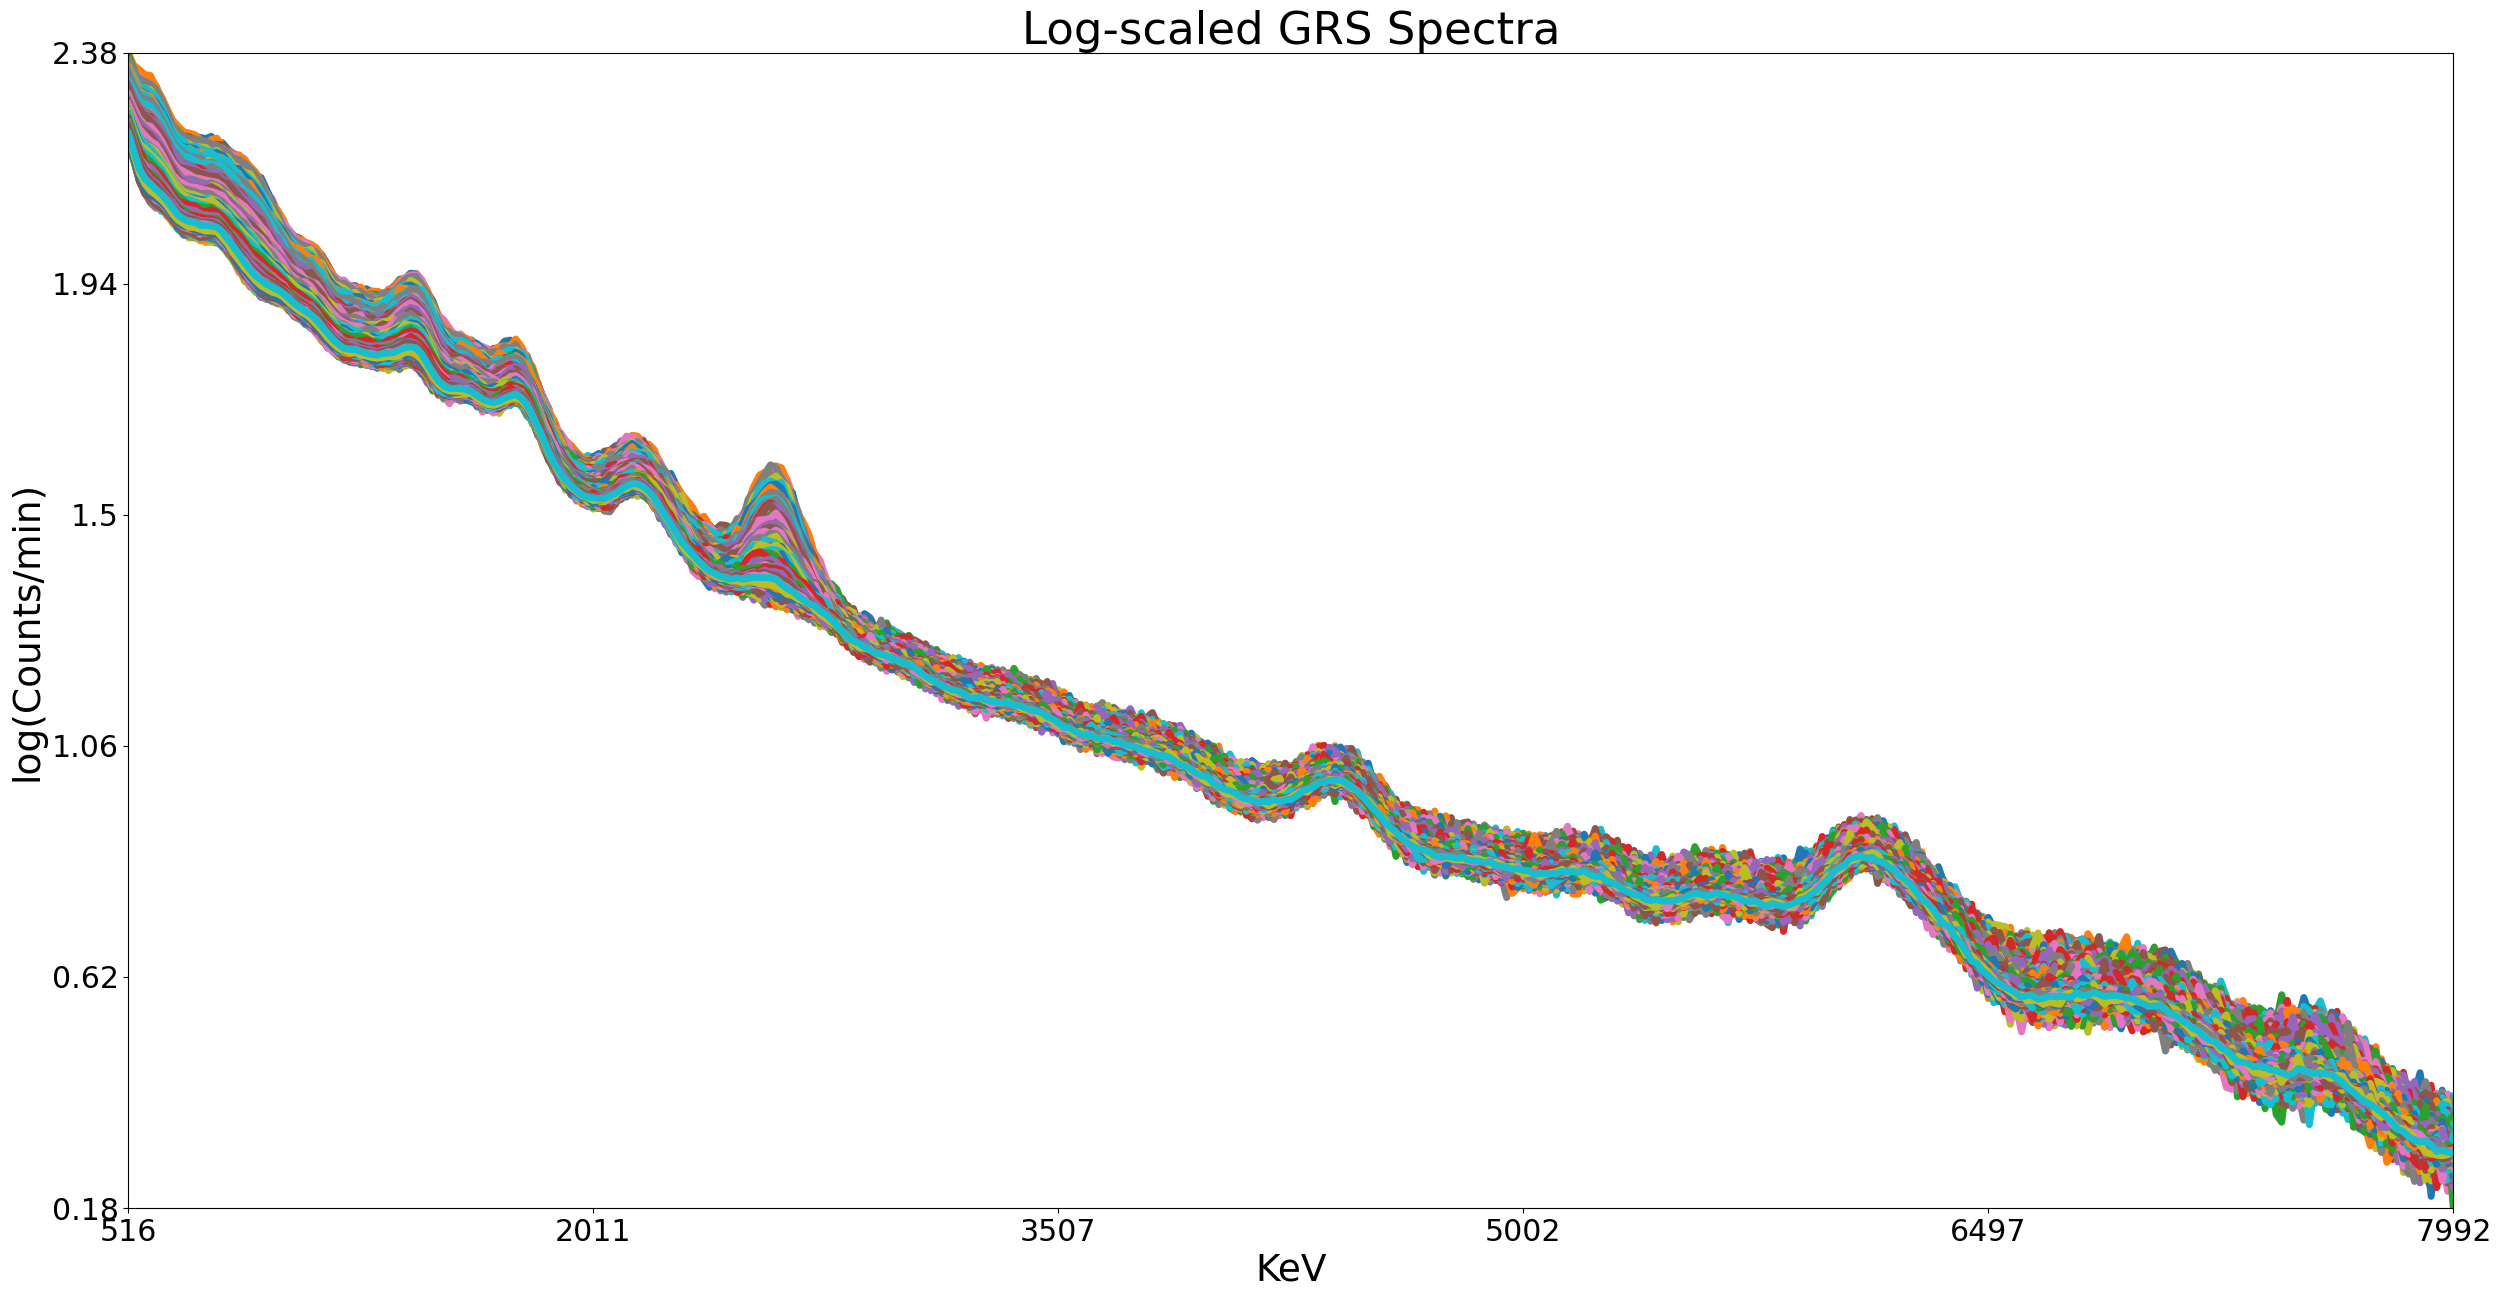

In [15]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Log-scaled GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [16]:
#import the Savitsky-Golay filter from scipy
from scipy.signal import savgol_filter
#import convex hull removal from pysptools
from pysptools.spectro import convex_hull_removal

In [17]:
#define a function which takes GR spectra and performs continuum removal on them
def removeGRContinuum(spectra):
    #scale the spectra between 0 and 1
    spectra=(spectra-np.amin(spectra,axis=-1,keepdims=True))/np.ptp(spectra,axis=-1,keepdims=True)
    
    #reflect the spectra along the line, y=max counts
    reflectedSpectra=np.amax(spectra)+(np.amax(spectra)-spectra)
    
    #create an array to hold the continuum removed spectra
    continuumRemovedSpecta=np.zeros_like(reflectedSpectra)
    
    #iterate through the reflected spectra and remove the continuum
    for currentSpectraIndex in range(reflectedSpectra.shape[0]):
        continuumRemovedSpecta[currentSpectraIndex,:]=convex_hull_removal(reflectedSpectra[currentSpectraIndex,:],
                                                                          energyBands)[0]
        
    #reflect the continuum removed spectra along the line, y=max counts
    reflectedContinuumRemovedSpecta=(np.amax(continuumRemovedSpecta)-continuumRemovedSpecta)
    
    #return the continuum removed spectra
    return reflectedContinuumRemovedSpecta

In [18]:
#define a function which takes GR spectra and normalized them (i.e. makes their l2-norm equal to one)
def normalizeSpectra(spectra):
    #create an array to hold the normalized spectra
    normalizedSpectra=np.zeros_like(spectra)
    
    #iterate through the spectra and normalize each
    for i in range(spectra.shape[0]):
        normalizedSpectra[i,:]=spectra[i,:]/np.linalg.norm(spectra[i,:])
        
    #return the normalized spectra
    return normalizedSpectra

In [19]:
#create an array to hold the the different filter sizes
filterSizes=[1,3,7,15,23,31]

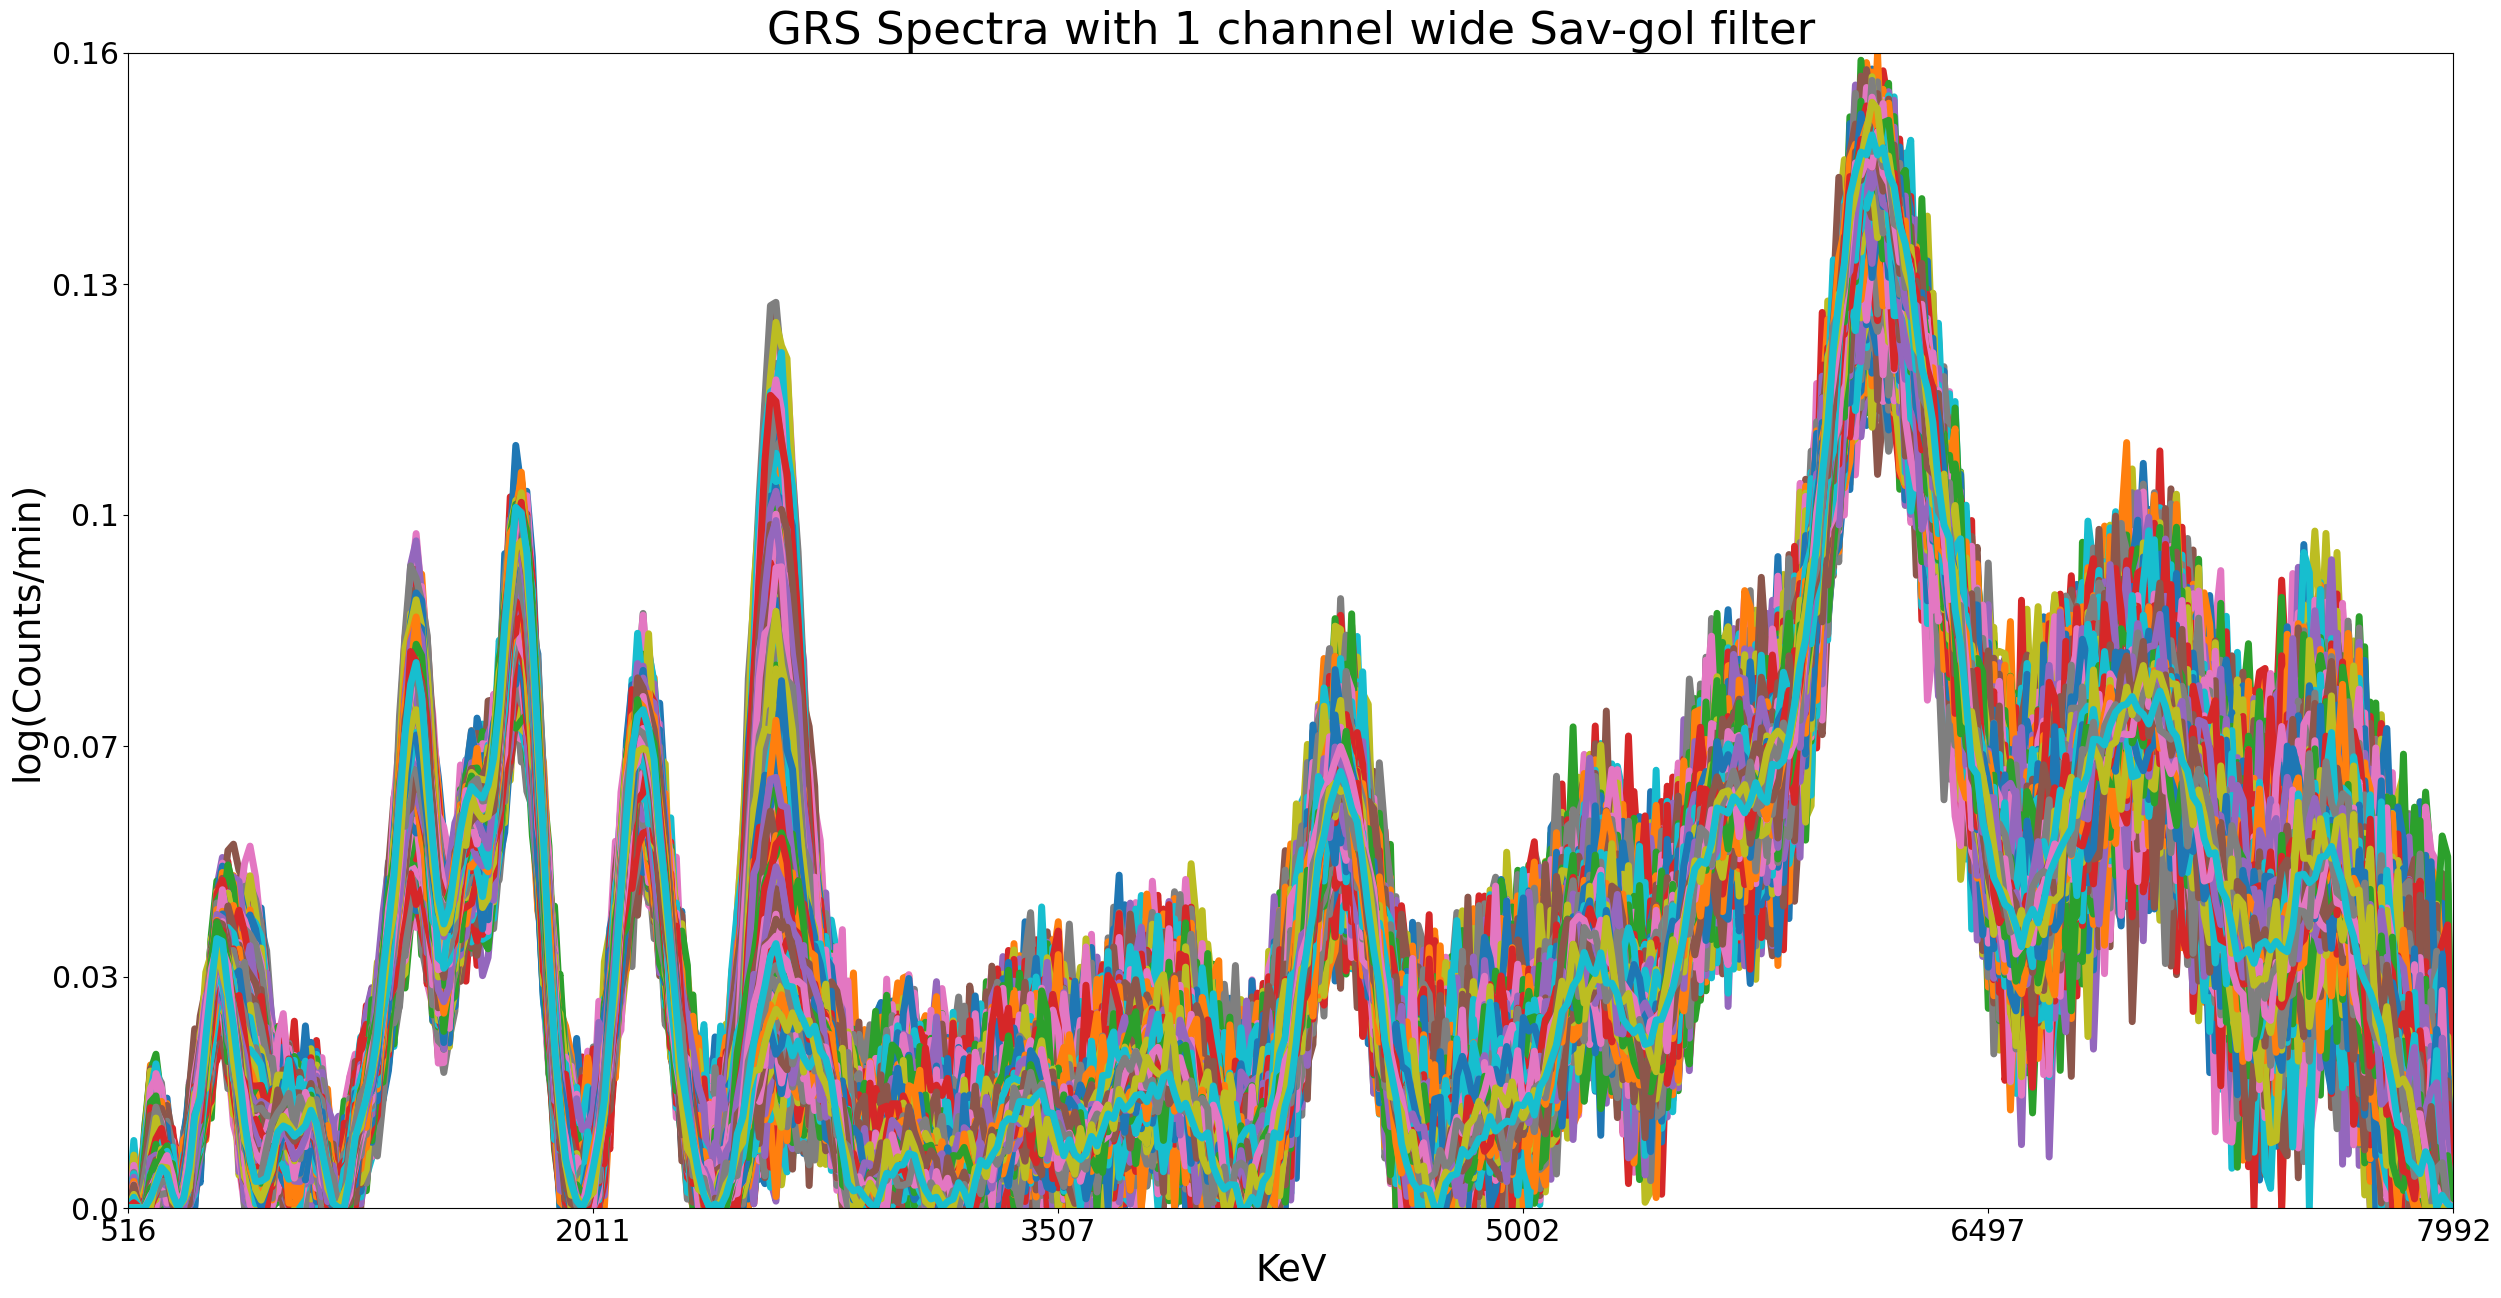

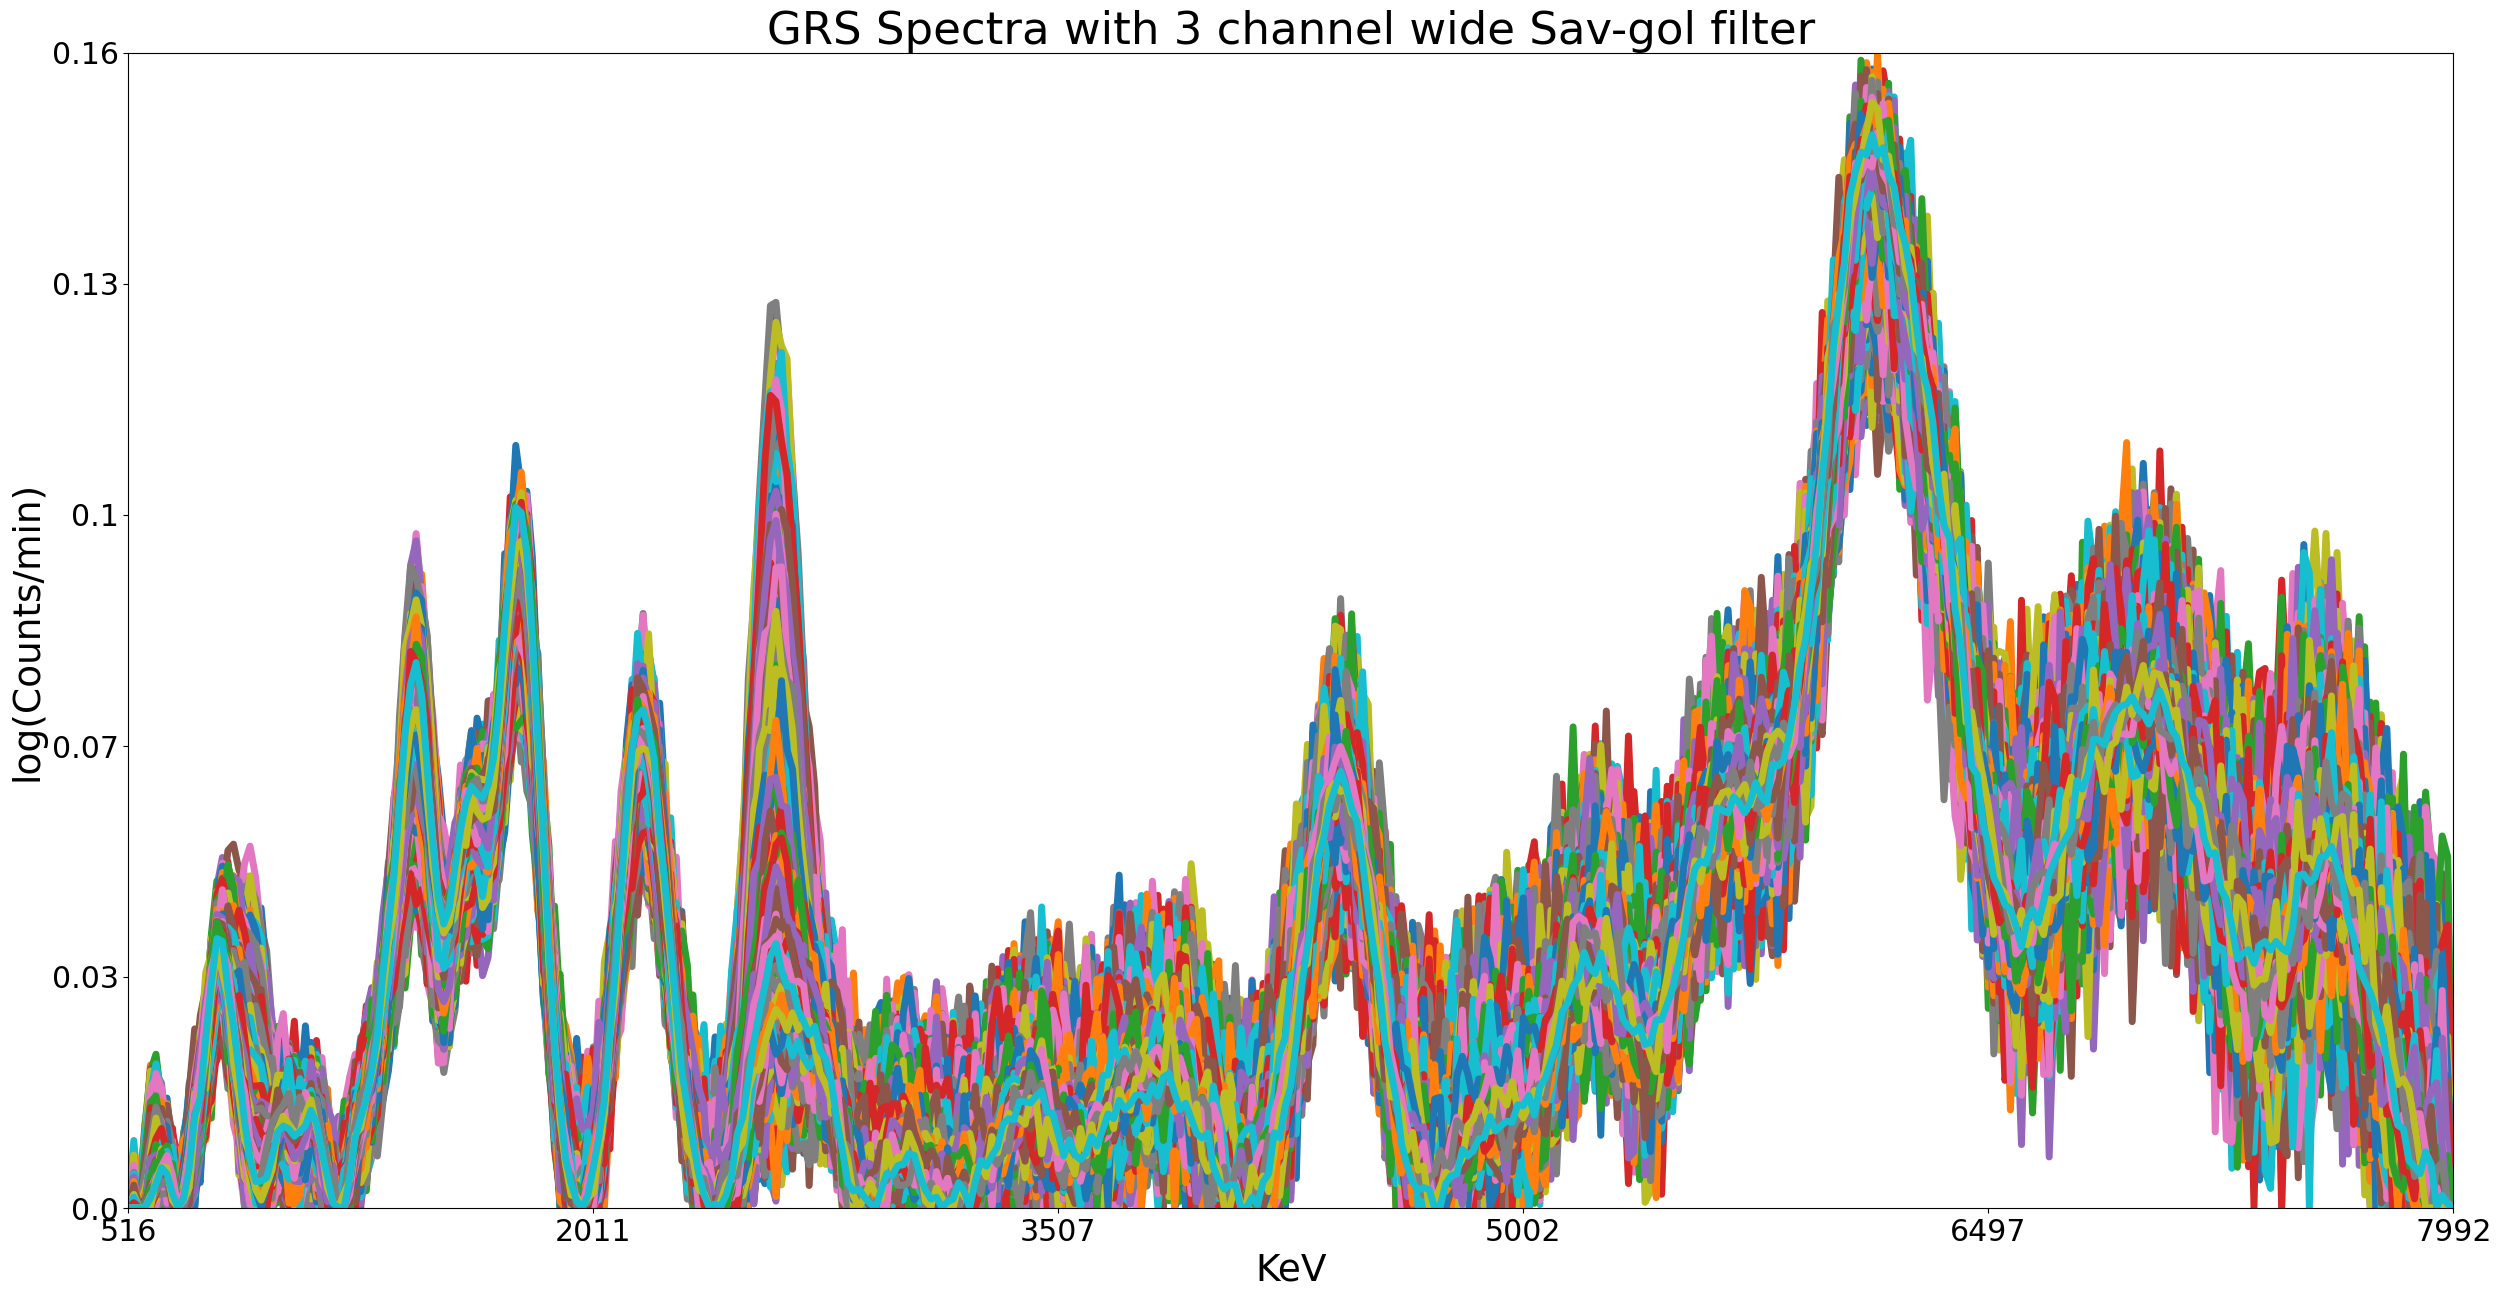

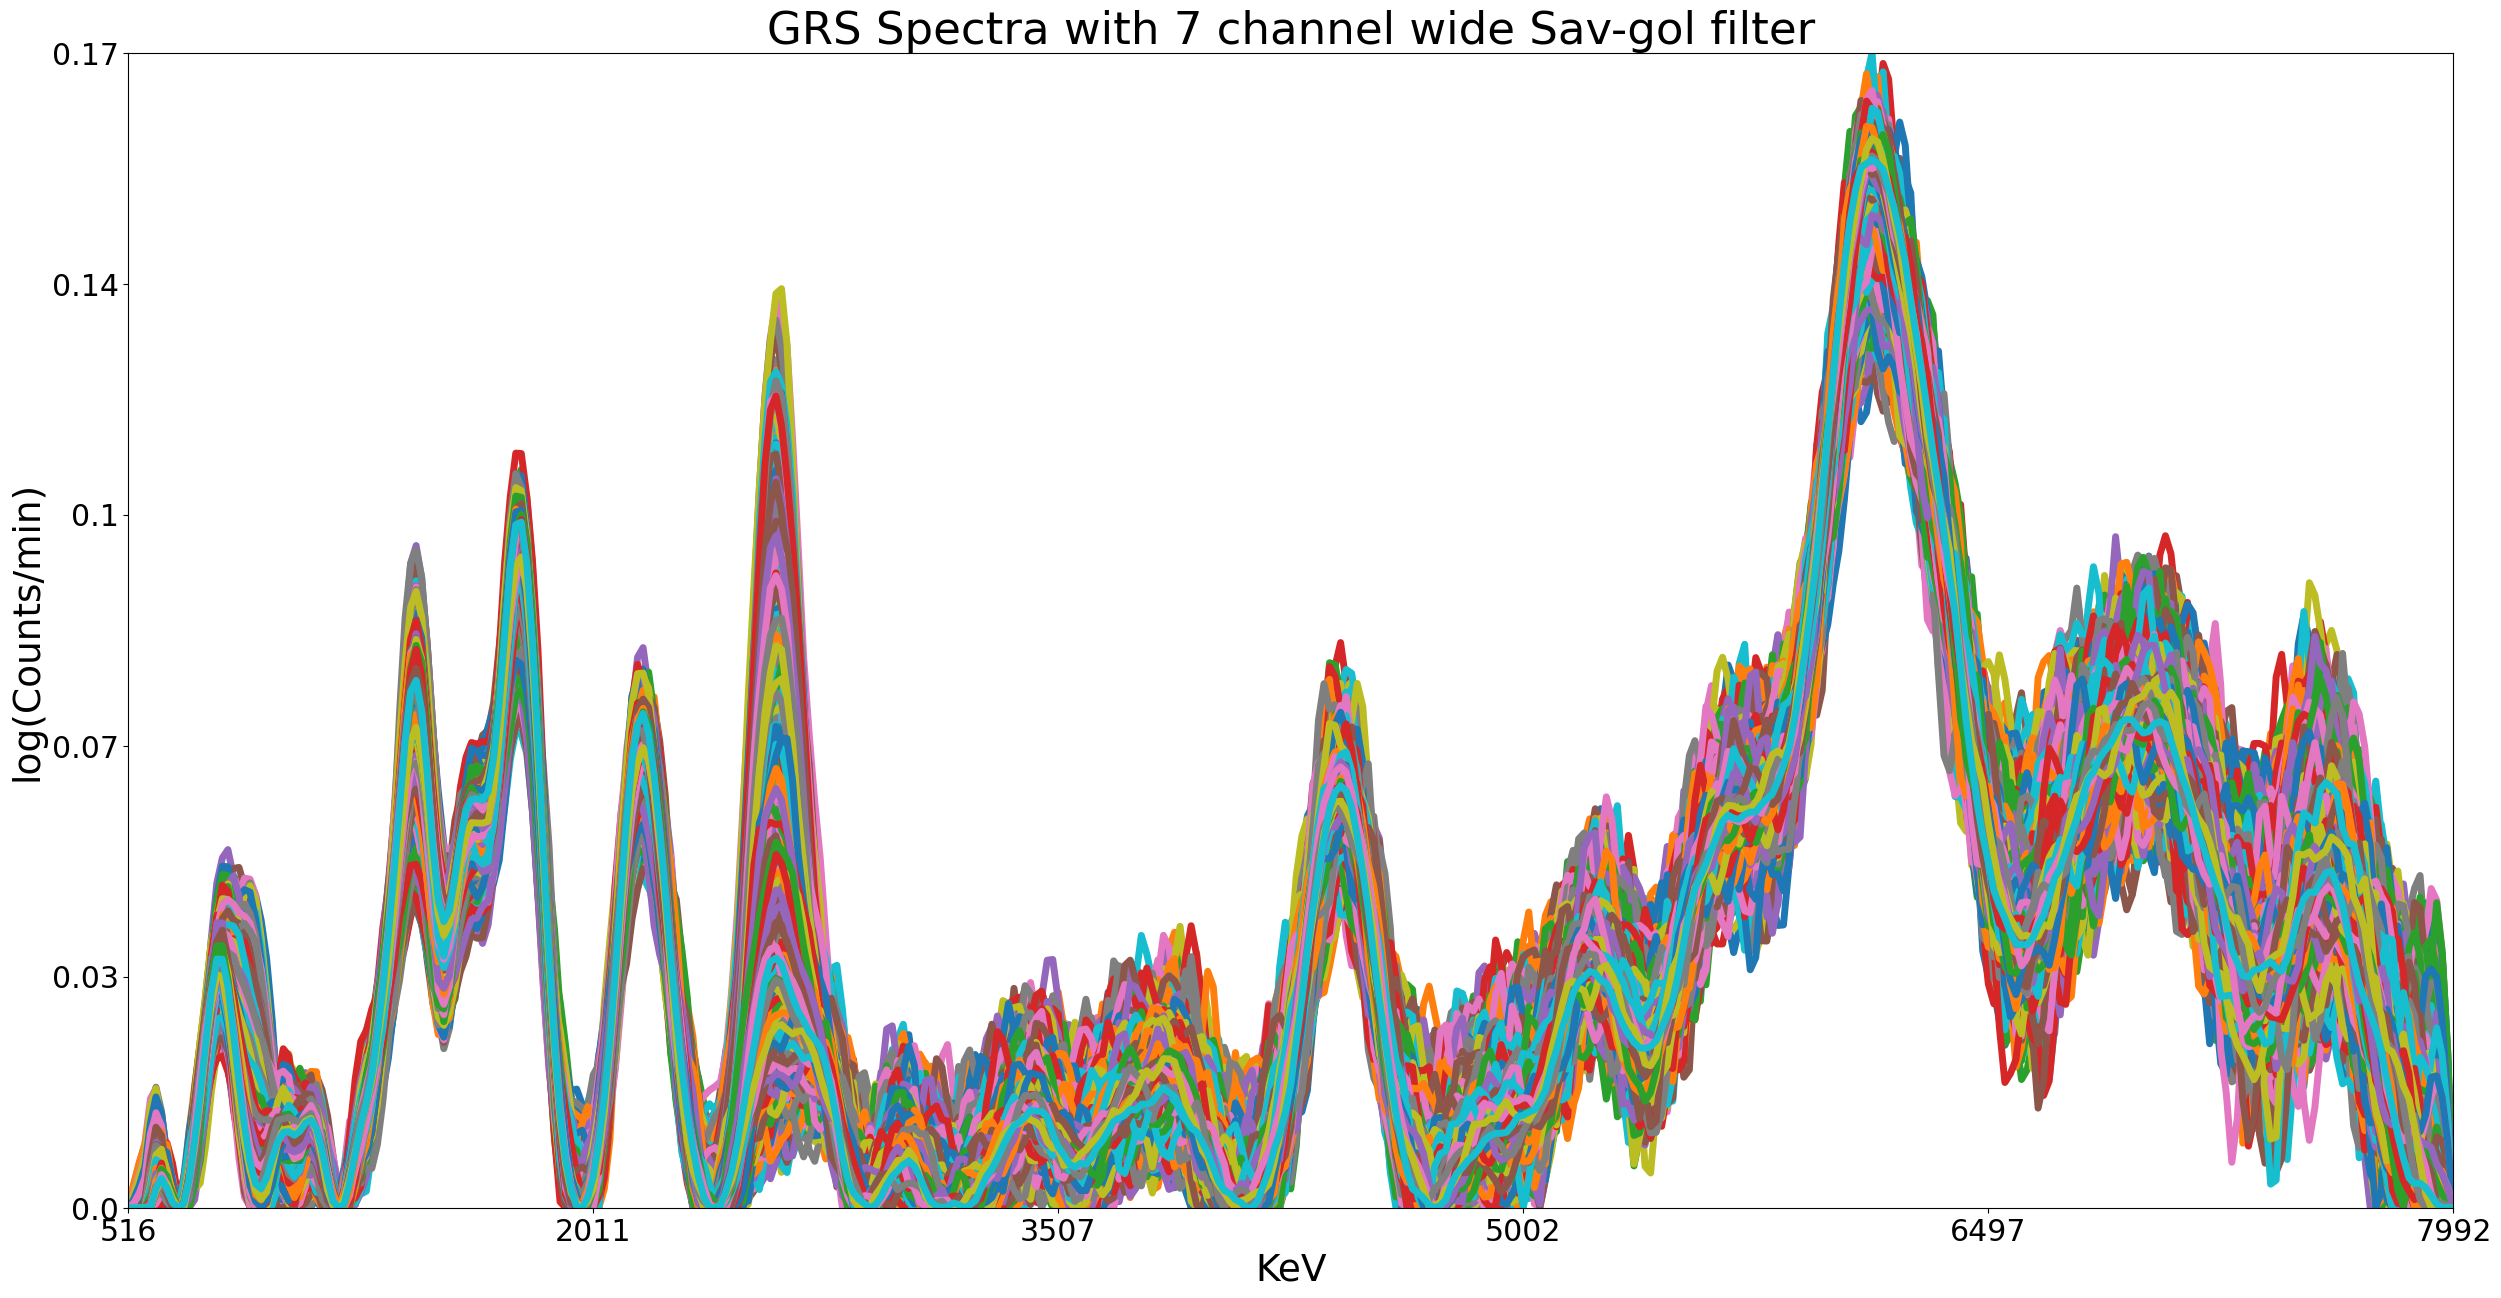

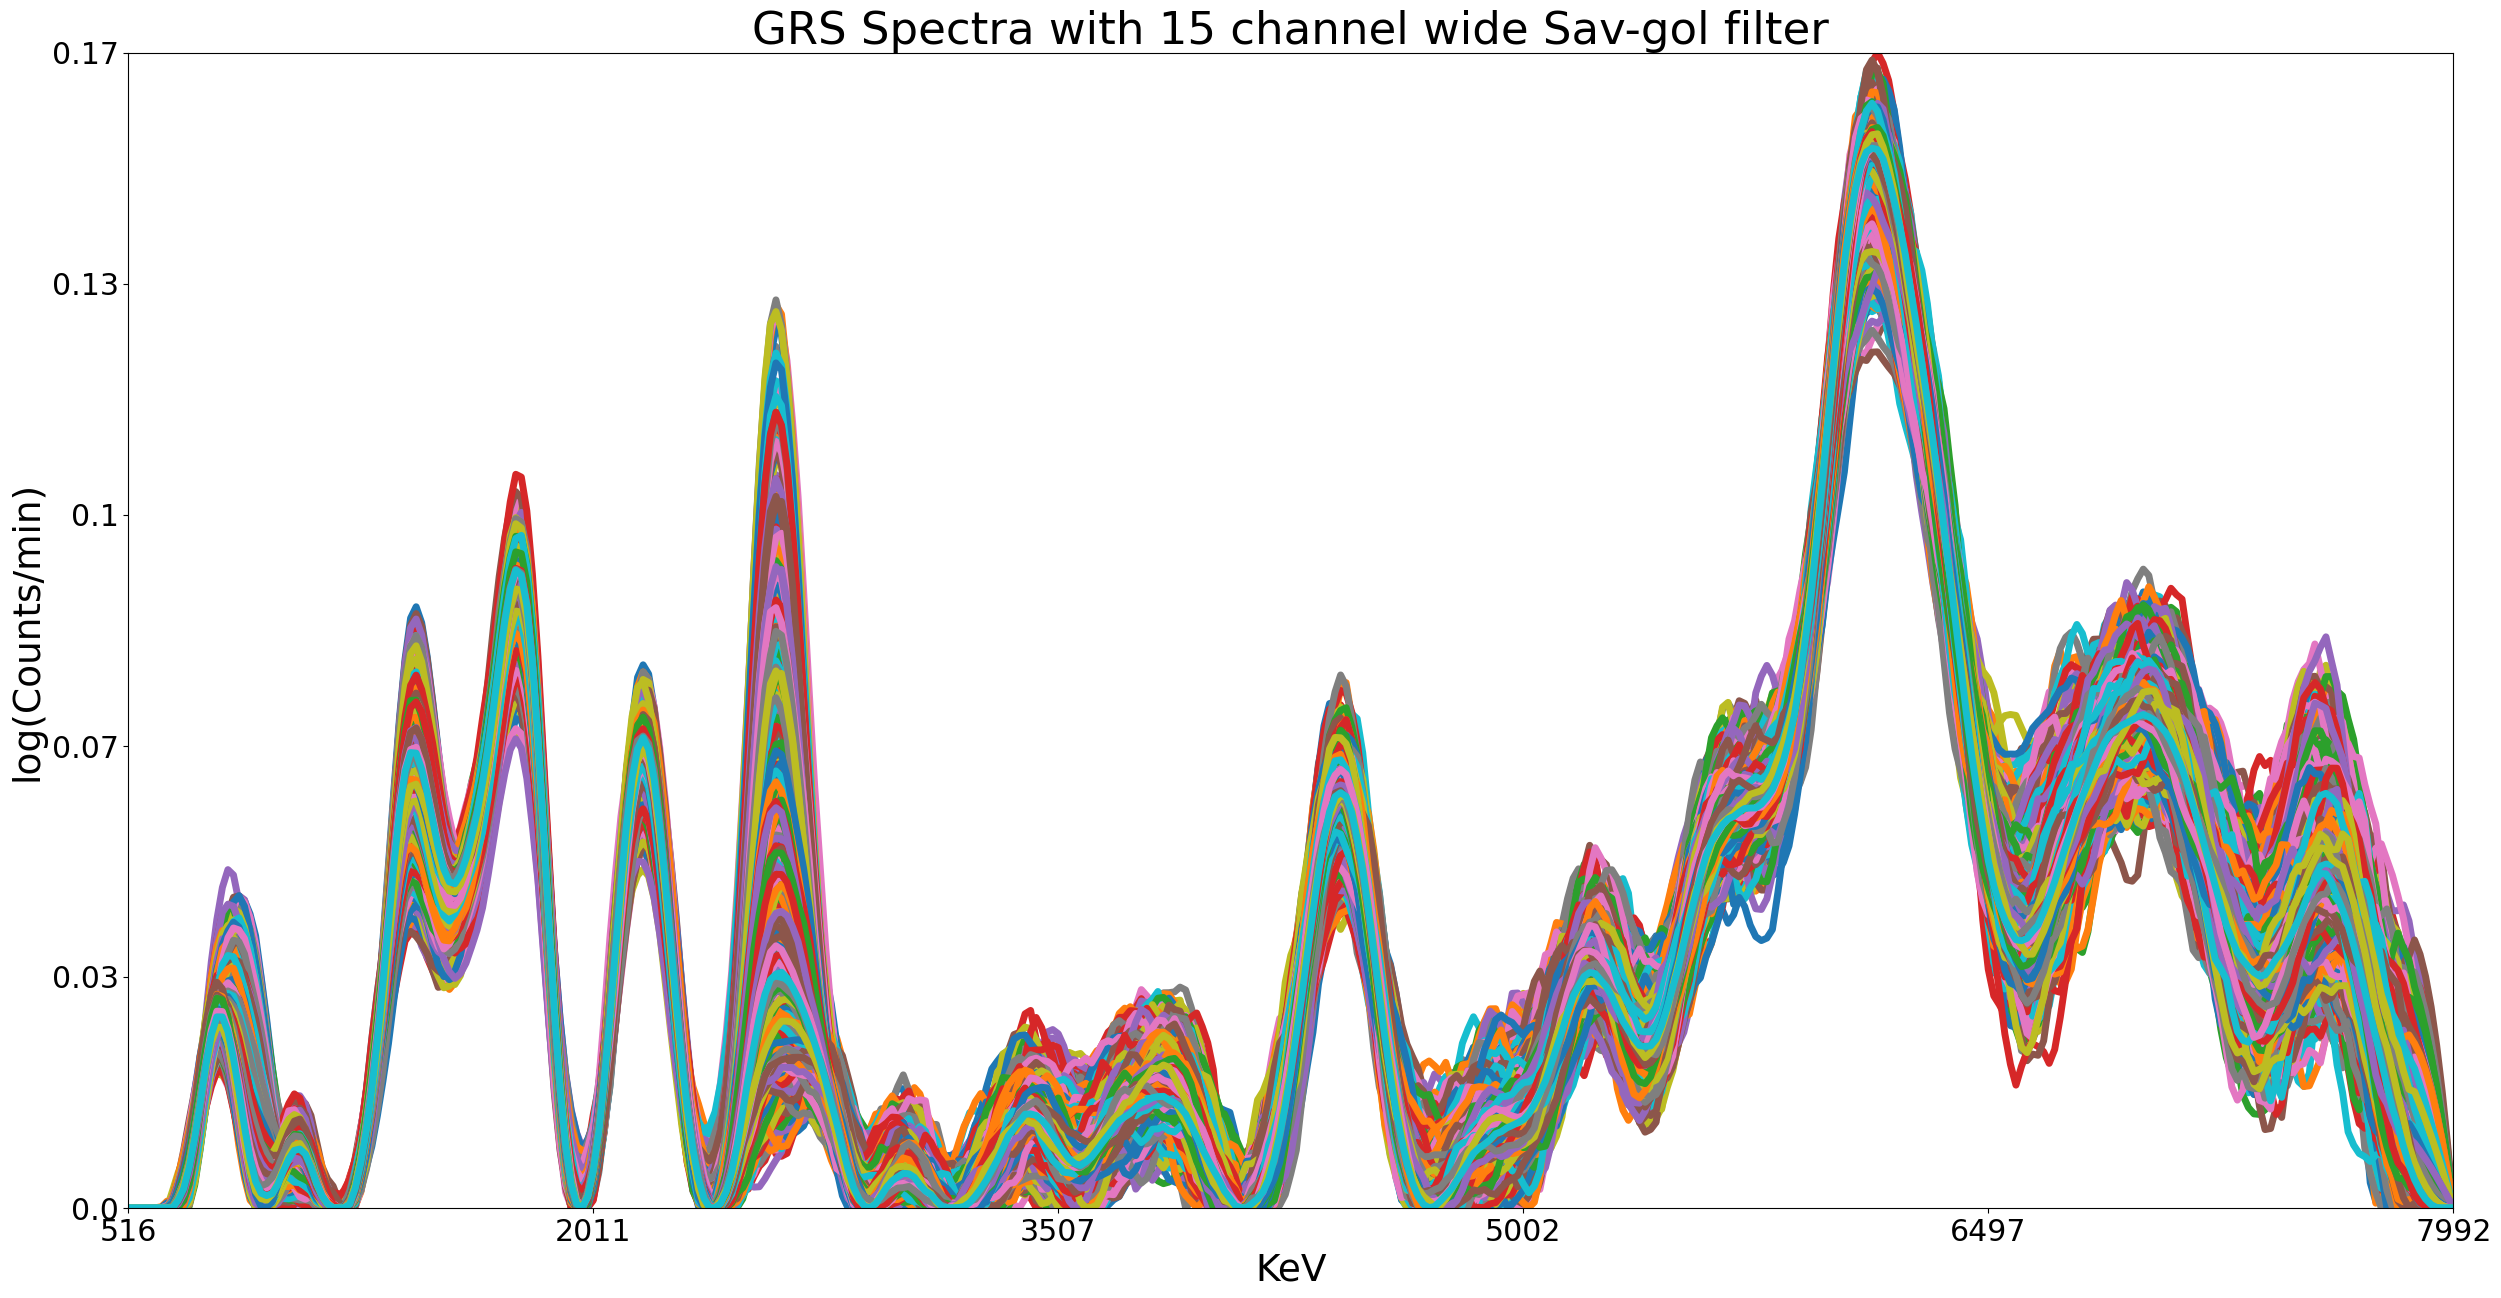

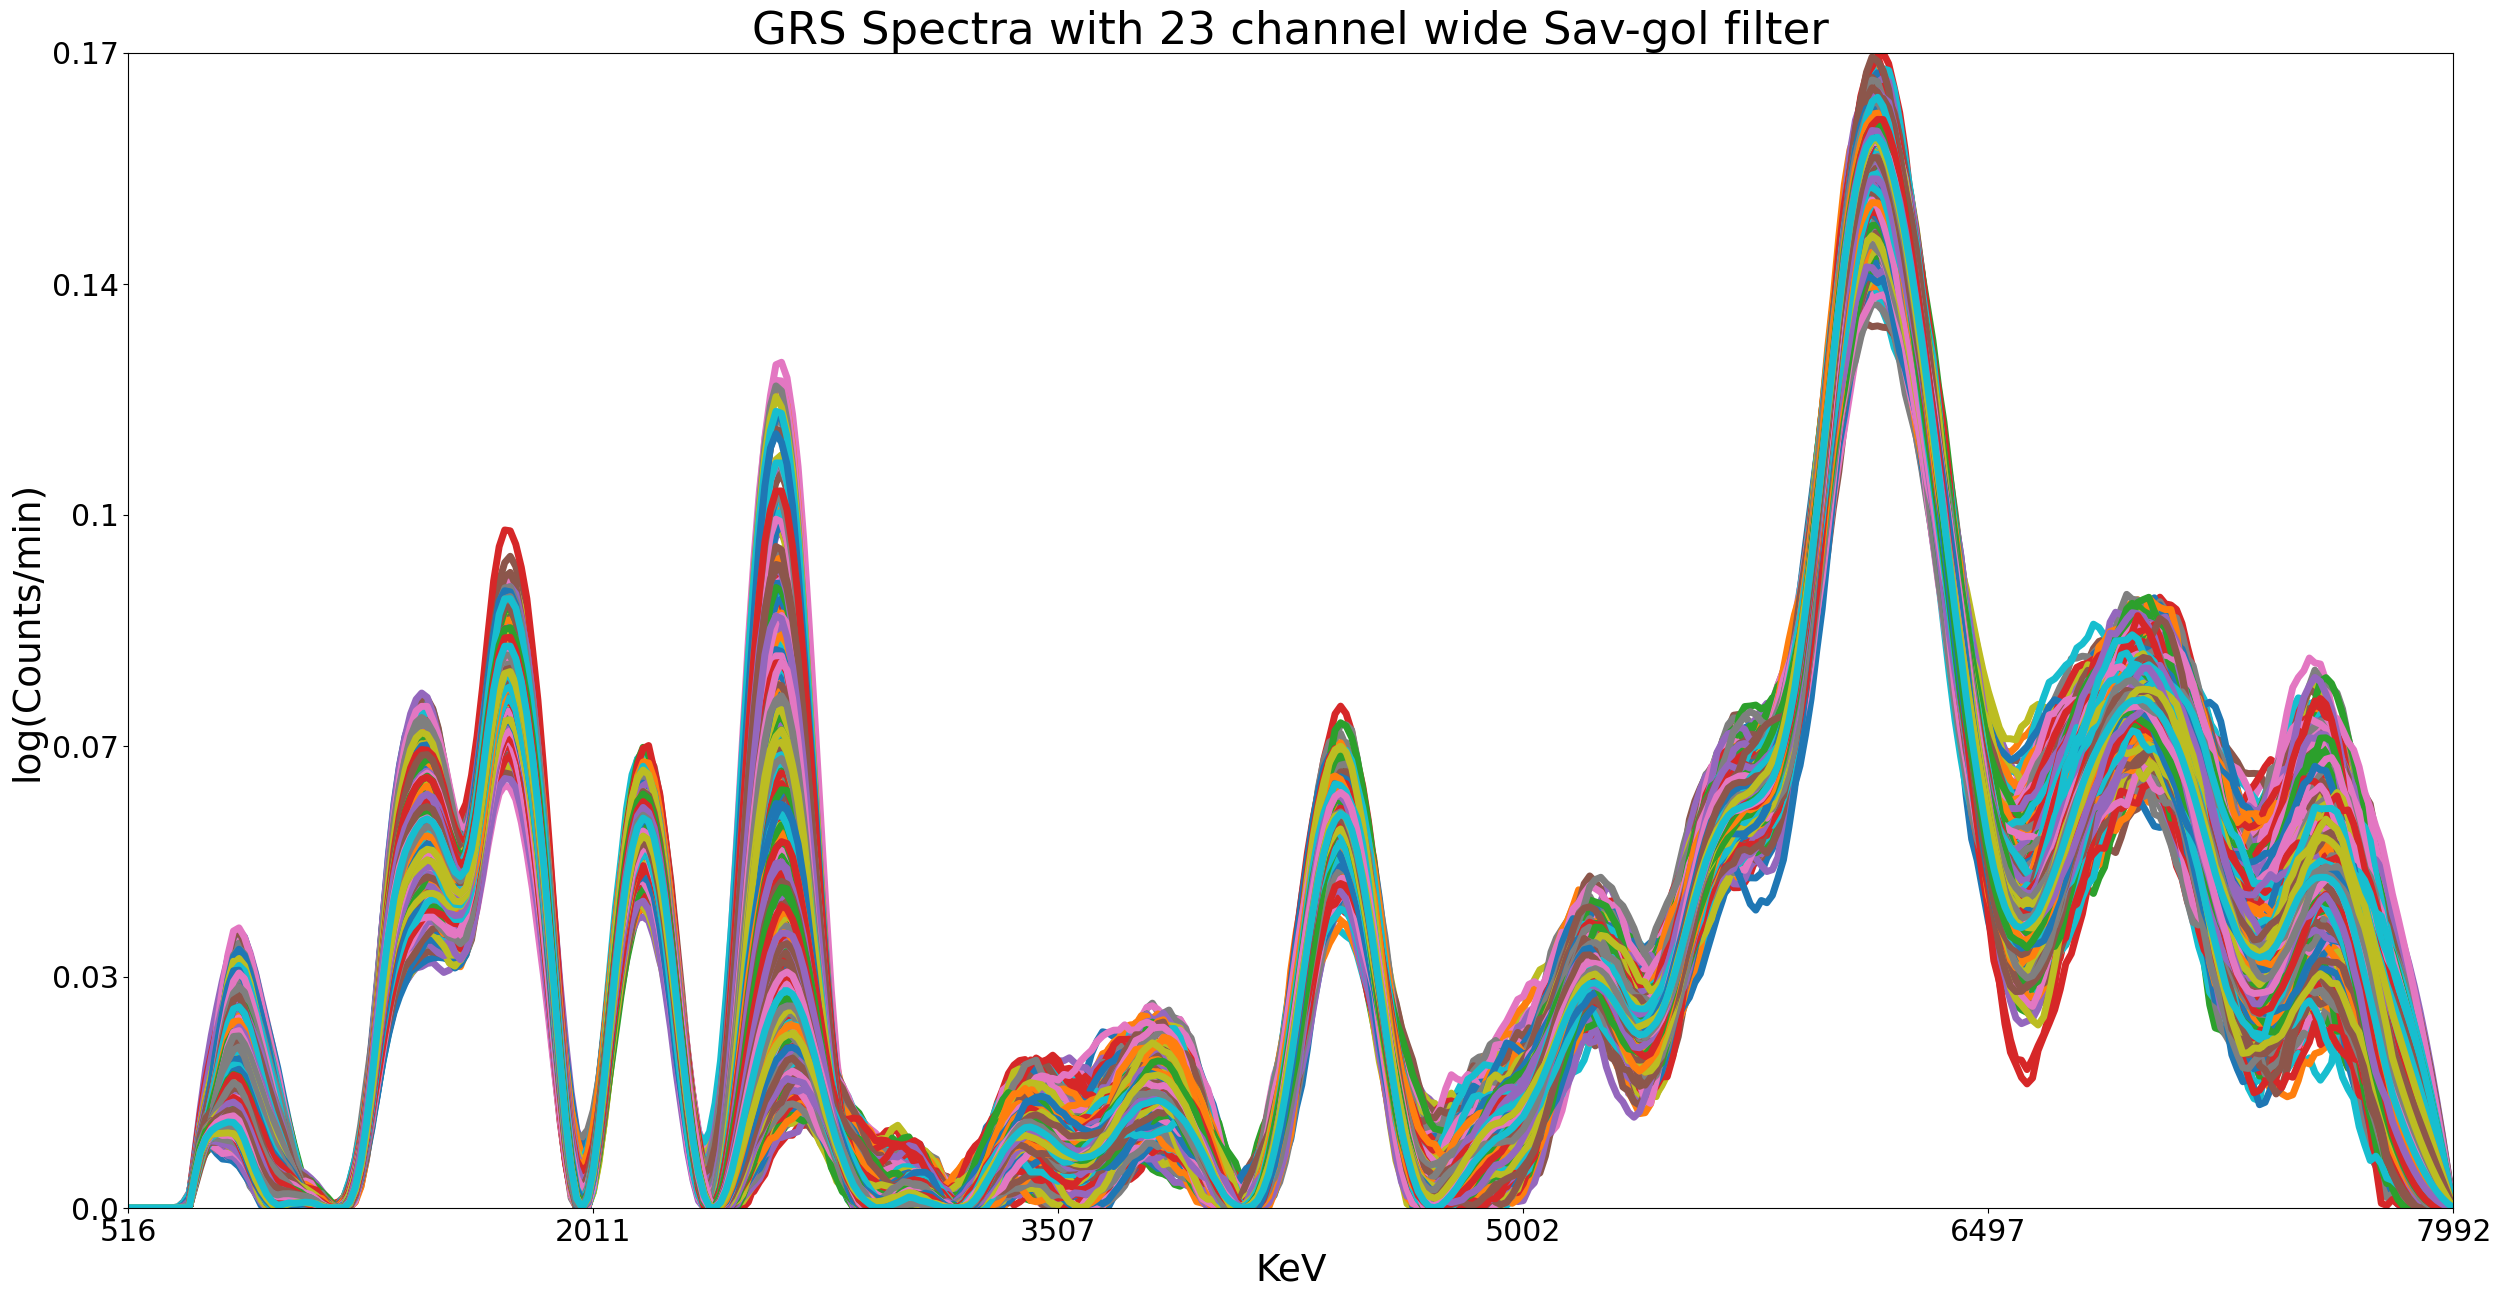

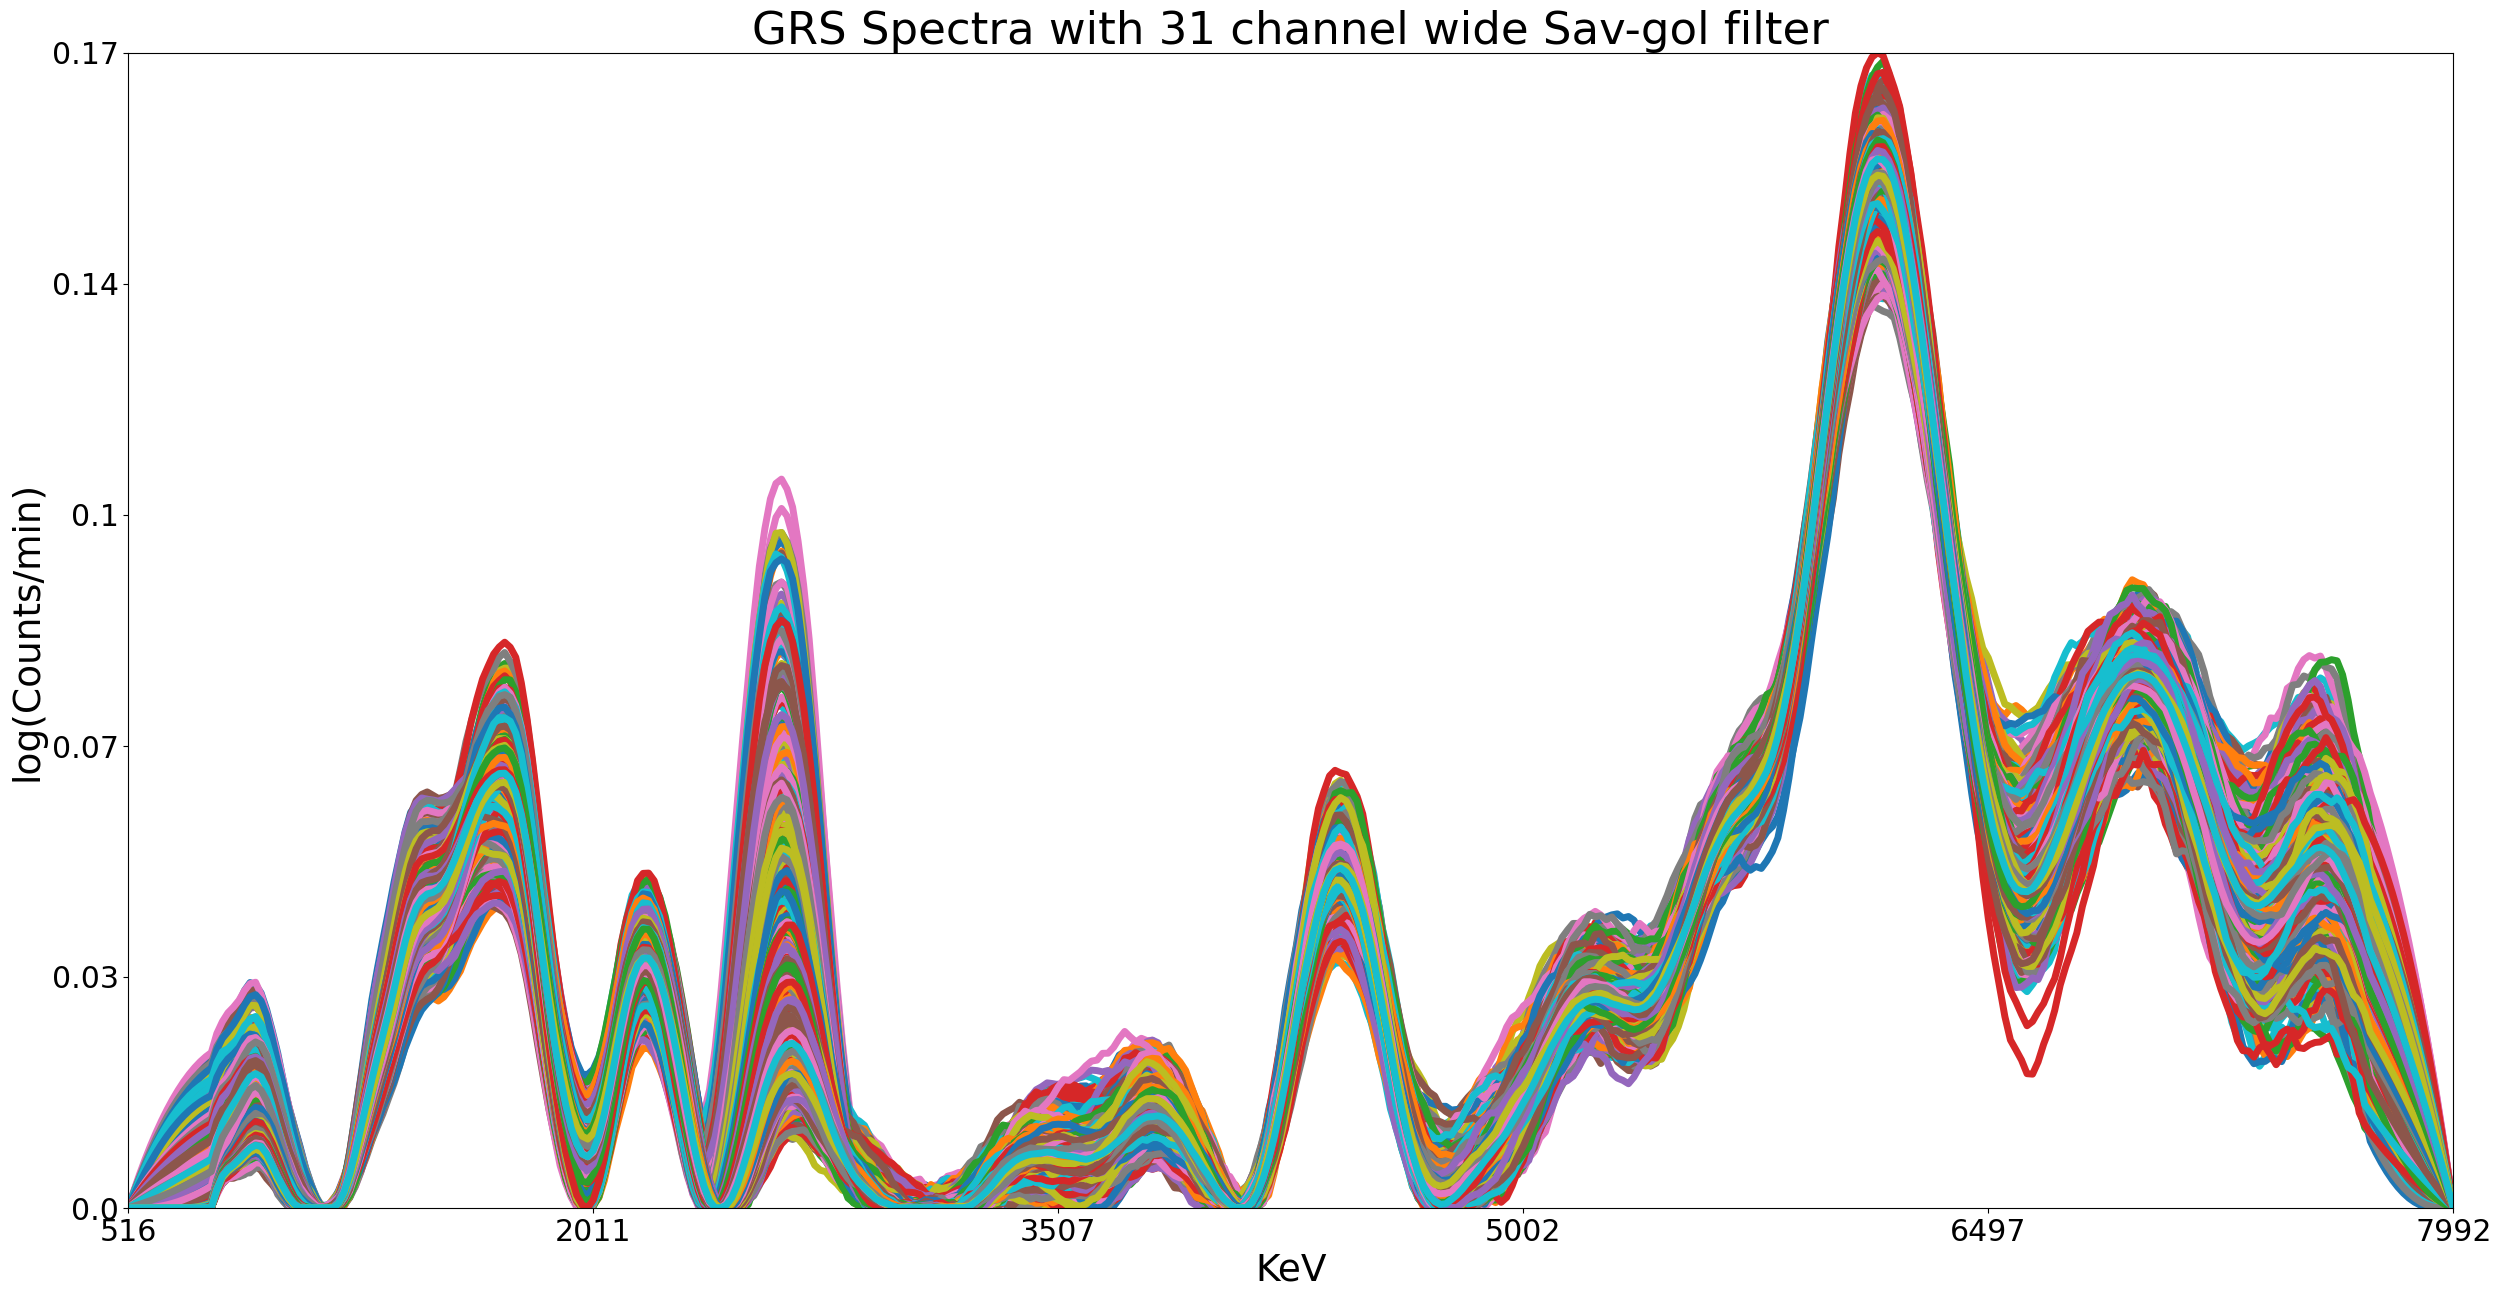

In [20]:
### create a list to hold the filtered spectra
progressivelyFilteredSpectra=[]
#create a copy for the preprocessed spectra array to save spectra at each level of smoothening
smoothenedSpectra=np.copy(preprocessedSpectra)
#iterate through the various sized filters, smoothen the spectra and save the smoothened results
for currentFilterSize,i in zip(filterSizes,range(len(filterSizes))):
    if currentFilterSize>1:
        #smoothen the spectra
        smoothenedSpectra=savgol_filter(preprocessedSpectra,
                                        window_length=currentFilterSize,
                                        polyorder=2,
                                        axis=-1)
    else:
        smoothenedSpectra=preprocessedSpectra
        
        
    #remove the continuum
    smoothenedSpectra=removeGRContinuum(smoothenedSpectra)
    
    #normalize the spectra
    smoothenedSpectra=normalizeSpectra(smoothenedSpectra)
    #create a figure
    plt.figure(figsize=(30,15),
               dpi=100)
    
    #and plot all the spectra
    for i in range(smoothenedSpectra.shape[0]):
        
        plt.plot(relaventEnergyBands,
                 smoothenedSpectra[i,:],
                 lw=5)
        
    #annotate the figure
    plt.title(f"GRS Spectra with {currentFilterSize} channel wide Sav-gol filter",
              fontsize=baseFontSize*1.8)
    plt.xticks(np.arange(np.amin(relaventEnergyBands),
                         np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                         np.ptp(relaventEnergyBands)/noOfXticks),
               fontsize=baseFontSize*1.2)
    plt.yticks(np.arange(np.amin(smoothenedSpectra),
                         np.amax(smoothenedSpectra)+np.ptp(smoothenedSpectra)/noOfXticks,
                         np.ptp(smoothenedSpectra)/noOfXticks),
               labels=np.round(np.arange(np.amin(smoothenedSpectra),
                                         np.amax(smoothenedSpectra)+np.ptp(smoothenedSpectra)/noOfXticks,
                                         np.ptp(smoothenedSpectra)/noOfXticks),
                               2),
               fontsize=baseFontSize*1.2)
    plt.xlabel("KeV",
               fontsize=baseFontSize*1.5)
    plt.ylabel("log(Counts/min)",
               fontsize=baseFontSize*1.5)
    plt.margins(0)
    
    #save the smoothened spectra
    progressivelyFilteredSpectra.append(smoothenedSpectra)

In [21]:
#delete Savitsky-Golay filter and import uniform filter from scipy
del savgol_filter

In [34]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [35]:
#set the number of folds across which the model is to be evaluated
noOfFolds=5
#set a global seed value
globalSeed=23
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [36]:
#create a dictionary to hold the training dataset
trainingDatasetDictionary={'PreprocessedSpectra':[],
                           'Aluminum':[],
                           'Calcium':[],
                           'Iron':[],
                           'Magnesium':[],
                           'Oxygen':[],
                           'Silicon':[],
                           'Titanium':[],
                           'Potassium':[],
                           'Thorium':[],
                           'Uranium':[],
                           'FilterSize':[],
                           'FoldNumber':[]
                           }
#create a dataframe to hold the foldwise training dataset from the dictionary
foldWiseaugmentedTrainingDataframe=pd.DataFrame.from_dict(trainingDatasetDictionary)            
#create a dataframe to hold the foldwise test dataset from the dictionary
foldwiseTestingDataframe=pd.DataFrame.from_dict(trainingDatasetDictionary)   

In [40]:
#iterate through the folds
for j,(trainingIndices,testingIndices) in enumerate(splitter.split(aluminiumAbundances)):
    
    #get the abundances for the training samples in the current fold
    trainingAluminiumAbundances=aluminiumAbundances[trainingIndices]
    trainingCalciumAbundances=calciumAbundances[trainingIndices]
    trainingIronAbundances=ironAbundances[trainingIndices]
    trainingMagnesiumAbundances=magnesiumAbundances[trainingIndices]
    trainingOxygenAbundances=oxygenAbundances[trainingIndices]
    trainingSiliconAbundances=siliconAbundances[trainingIndices]
    trainingTitaniumAbundances=titaniumAbundances[trainingIndices]
    trainingPotassiumAbundances=potassiumAbundances[trainingIndices]
    trainingThoriumAbundances=thoriumAbundances[trainingIndices]
    trainingUraniumAbundances=uraniumAbundances[trainingIndices]
    
    #iterate through the the different levels of smoothening
    for currentFilterSize,i in zip(filterSizes,range(len(filterSizes))):
        #get the spectra at the current level of smoothening
        currentSpectraSet=progressivelyFilteredSpectra[i]
        
        #get the training spectra for the current fold
        trainingSpectra=[]
        for k in trainingIndices:
            trainingSpectra.append(currentSpectraSet[k,:])
        
        #create an array containing the size of the filter used to generate the spectra
        filterSizeArray=np.array([currentFilterSize]*len(trainingSpectra))
        
        #create an array containing the fold for the the spectra are to be used for training
        FoldArray=np.array([j]*len(trainingSpectra))
        
        #create a temporary dataset for the current fold and smoothening level
        tempFrame={'PreprocessedSpectra':trainingSpectra,
                   'Aluminum':trainingAluminiumAbundances,
                   'Calcium':trainingCalciumAbundances,
                   'Iron':trainingIronAbundances,
                   'Magnesium':trainingMagnesiumAbundances,
                   'Oxygen':trainingOxygenAbundances,
                   'Silicon':trainingSiliconAbundances,
                   'Titanium':trainingTitaniumAbundances,
                   'Potassium':trainingPotassiumAbundances,
                   'Thorium':trainingThoriumAbundances,
                   'Uranium':trainingUraniumAbundances,
                   'FilterSize':filterSizeArray,
                   'FoldNumber':FoldArray
                   }
        tempFrame=pd.DataFrame.from_dict(tempFrame)   
        #concat the current dataframe to the training dataframe
        foldwiseTrainingDataframe=pd.concat([foldwiseTrainingDataframe,tempFrame])
    
    #get the testing spectra for the current fold
    testingSpectra=[]
    for k in testingIndices:
        testingSpectra.append(progressivelyFilteredSpectra[-1][k,:])
        
    #get the abundances for the testing samples in the current fold
    testingAluminiumAbundances=aluminiumAbundances[testingIndices]
    testingCalciumAbundances=calciumAbundances[testingIndices]
    testingIronAbundances=ironAbundances[testingIndices]
    testingMagnesiumAbundances=magnesiumAbundances[testingIndices]
    testingOxygenAbundances=oxygenAbundances[testingIndices]
    testingSiliconAbundances=siliconAbundances[testingIndices]
    testingTitaniumAbundances=titaniumAbundances[testingIndices]
    testingPotassiumAbundances=potassiumAbundances[testingIndices]
    testingThoriumAbundances=thoriumAbundances[testingIndices]
    testingUraniumAbundances=uraniumAbundances[testingIndices]
    
    #create an array containing the size of the filter used to generate the spectra
    filterSizeArray=np.array([filterSizes[-1]]*len(testingSpectra))

    #create an array containing the fold for the the spectra are to be used for training
    FoldArray=np.array([j]*len(testingSpectra))
        
    #create a temporary dataset for the current fold and smoothening level
    tempFrame={'PreprocessedSpectra':testingSpectra,
               'Aluminum':testingAluminiumAbundances,
               'Calcium':testingCalciumAbundances,
               'Iron':testingIronAbundances,
               'Magnesium':testingMagnesiumAbundances,
               'Oxygen':testingOxygenAbundances,
               'Silicon':testingSiliconAbundances,
               'Titanium':testingTitaniumAbundances,
               'Potassium':testingPotassiumAbundances,
               'Thorium':testingThoriumAbundances,
               'Uranium':testingUraniumAbundances,
               'FilterSize':filterSizeArray,
               'FoldNumber':FoldArray
               }
    tempFrame=pd.DataFrame.from_dict(tempFrame)   
    #concat the current dataframe to the training dataframe
    foldwiseTestingDataframe=pd.concat([foldwiseTestingDataframe,tempFrame])    
        
        

In [41]:
foldwiseTrainingDataframe

PreprocessedSpectra  Aluminum  Calcium  \
0     [0.0, 0.00023026119860822548, 0.0, 0.0, 0.0, 0...    15.151   11.456   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.002546196180926018...    13.394   10.459   
2     [0.0, 0.000858320638273384, 0.0, 0.0, 0.0, 0.0...    14.642   12.301   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.003526010873503723...    14.030   13.188   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.001932230143094235...    14.823   12.573   
...                                                 ...       ...      ...   
1427  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    14.908   11.022   
1428  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    14.201   10.645   
1429  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    14.718   11.873   
1430  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15.137   11.178   
1431  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15.185   11.405   

        Iron  Magnesium  Oxygen  Silicon  Titanium  Potassium  Thorium  \
0     3.6233     3.5168  45.289   20.793   0.17034     299.99  0.46453   
1     4.2466     4.2240  45.529   22.029   0.11806     376.77  0.65727   
2     3.8019     3.6490  44.706   20.687   0.21359     255.60  0.44024   
3     3.6497     3.4253  44.777   20.930   0.00000     299.84  0.41695   
4     3.6489     3.2358  44.853   20.750   0.11472     229.92  0.34499   
...      ...        ...     ...      ...       ...        ...      ...   
1427  3.9665     4.8716  44.940   20.180   0.11112     935.92  1.65770   
1428  3.9081     4.9509  45.074   20.989   0.23089     725.37  1.47520   
1429  4.0291     3.5729  44.902   20.763   0.14168     615.29  1.13880   
1430  3.9543     3.4631  45.209   20.913   0.14485     534.21  0.92528   
1431  4.0881     4.2786  44.799   20.098   0.14671     714.98  1.31050   

      Uranium  FilterSize  FoldNumber  
0     0.17684         1.0         0.0  
1     0.14017         1.0         0.0  
2     0.15456         1.0         0.0  
3     0.17853         1.0         0.0  
4     0.16053         1.0         0.0  
...       ...         ...         ...  
1427  0.47992        31.0         4.0  
1428  0.31377        31.0         4.0  
1429  0.36836        31.0         4.0  
1430  0.24324        31.0         4.0  
1431  0.41704        31.0         4.0  

[128880 rows x 13 columns]

In [39]:
foldwiseTestingDataframe

PreprocessedSpectra  Aluminum  Calcium  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    13.634   12.915   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    14.860   13.772   
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15.325   13.090   
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    11.739   11.524   
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    13.282   10.500   
..                                                 ...       ...      ...   
353  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    14.404   12.211   
354  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15.504   11.729   
355  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15.107   10.912   
356  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    14.719   11.148   
357  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    15.413   10.730   

       Iron  Magnesium  Oxygen  Silicon  Titanium  Potassium  Thorium  \
0    4.1853     3.5352  44.660   20.907   0.16417    375.200  0.59783   
1    3.3596     3.2803  44.191   20.274   0.26327     70.337  0.24921   
2    3.3959     3.1546  44.616   20.183   0.23597    115.010  0.25103   
3    5.9377     5.0469  44.391   20.965   0.39534    477.230  1.23860   
4    4.6480     6.0413  45.176   20.353   0.00000    383.570  1.18760   
..      ...        ...     ...      ...       ...        ...      ...   
353  3.6094     3.3863  44.913   21.349   0.12742    483.420  1.04260   
354  3.4371     2.8668  45.300   21.163   0.00000    420.270  0.78328   
355  3.6614     4.4280  45.091   20.801   0.00000    457.830  0.80573   
356  3.7915     4.8275  44.898   20.327   0.28896    759.770  1.36980   
357  4.0343     5.7985  44.722   19.030   0.27167    862.160  1.85850   

     Uranium  FilterSize  FoldNumber  
0    0.25209        31.0         0.0  
1    0.11417        31.0         0.0  
2    0.13661        31.0         0.0  
3    0.47256        31.0         0.0  
4    0.44485        31.0         0.0  
..       ...         ...         ...  
353  0.32157        31.0         4.0  
354  0.30130        31.0         4.0  
355  0.17495        31.0         4.0  
356  0.38707        31.0         4.0  
357  0.65442        31.0         4.0  

[1790 rows x 13 columns]

In [33]:
len(progressivelyFilteredSpectra)

6